Step 1.Installing pip, Import and install dependencies

In [ ]:
python get-pip.py


In [4]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 787.7 kB/s eta 0:00:49
   ---------------------------------------- 0.5/38.6 MB 3.8 MB/s eta 0:00:11
    --------------------------------------- 0.9/38.6 MB 5.4 MB/s eta 0:00:08
   - -------------------------------------- 1.4/38.6 MB 6.2 MB/s eta 0:00:06
   - -------------------------------------- 1.8/38.6 MB 6.7 MB/s eta 0:00:06
   -- ------------------------------------- 2.2/38.6 MB 7.0 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/38.6 MB 7.3 MB/s eta 0:00:05
   --- ------------------------------------ 3.1/38.6 MB 7.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.5/38.6 MB 7.6 MB/s eta 0:00:05
   ---- ----------------------------------- 3.9/38.6 MB 7.7 MB/s eta 0:00:05
   ---- ----------------------------------- 4.3/38.6 MB 7.9 MB/s eta 0:00:05
   ---- ---

In [6]:
!pip install mediapipe scikit-learn matplotlib

  Using cached mediapipe-0.10.11-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/50.8 MB 7.3 MB/s eta 0:00:07
   ---------------------------------------- 0.5/50.8 MB 5.6 MB/s eta 0:00:09
    --------------------------------------- 0.8/50.8 MB 6.1 MB/s eta 0:00:09
    --------------------------------------- 1.2/50.8 MB 6.4 MB/s eta 0:00:08
   - -------------------------------------- 1.6/50.8 MB 7.4 MB/s eta 0:00:07
   - -------------------------------------- 2.1/50.8 MB 7.7 MB/s eta 0:00:07
   - -------------------------------------- 2.5/50.8 MB 7.9 MB/s eta 0:00:07
   -- ------------------------------------- 2.9/50.8 MB 8.0 MB/s eta 0:00:06
   -- ------------------------------------- 3.3/50.8 MB 8.1 MB/s eta 0:00:06
   -- ------------------------------------- 3.7/50.8 MB 8.2 MB/s eta 0:00:06
   --- ------------------------------------ 4.2/50.8 MB 8.3 MB/s eta 0:00:06
   ---

In [7]:
!pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/377.0 MB 11.2 MB/s eta 0:00:34
   ---------------------------------------- 0.8/377.0 MB 10.2 MB/s eta 0:00:37
   ---------------------------------------- 1.2/377.0 MB 9.8 MB/s eta 0:00:39
   ---------------------------------------- 1.7/377.0 MB 9.6 MB/s eta 0:00:39
   ---------------------------------------- 2.1/377.0 MB 9.5 MB/s eta 0:00:40
   ---------------------------------------- 2.5/377.0 MB 9.4 MB/s eta 0:00:40
   ---------------------------------------- 2.9/377.0 MB 9.3 MB/s eta 0:00:41
   ---------------------------------------- 3.4/377.0 MB 9.3 MB/s eta 0:00:41
   ---------------------------------------- 3.8/377.0 MB 9.3 MB/s eta 0:00:41
   ---------------------------------------- 4.2/377.0 MB 9.2 MB/s eta 0:0

IMPORTS AND DEPENDECIES 

In [11]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from mediapipe.python.solutions import drawing_utils
from mediapipe.python.solutions import holistic as mp_holistic



In [60]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image color to RGB
    image.flags.writeable = False                   # Mark the image as not writeable to improve performance
    results = model.process(image)                  # Make detection
    image.flags.writeable = True                    # Mark the image as writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert the image color back to BGR
    return image, results


In [13]:
# Initialize holistic model and drawing utilities
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils


COLLECTIONG THE LANDMARKS

In [14]:
#function to drawn landmarks
def draw_styled_landmarks(image, results):
    # Draw face connections if face landmarks are detected
    if results.face_landmarks:
        drawing_utils.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_CONTOURS,
                                     drawing_utils.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                                     drawing_utils.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                    )

        # Draw pose connections if face landmarks are detected
        drawing_utils.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                     drawing_utils.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                                     drawing_utils.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                    ) 
        # Draw left hand connections if face landmarks are detected
        drawing_utils.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     drawing_utils.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                                     drawing_utils.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                    ) 
        # Draw right hand connections if face landmarks are detected
        drawing_utils.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                     drawing_utils.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                                     drawing_utils.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                    ) 

#import the number differ according to your operation system 0= windows 1= mac
cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('1'):
            break

cap.release()
cv2.destroyAllWindows()
#show resulst of the frame with landmarks
draw_styled_landmarks(frame, results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

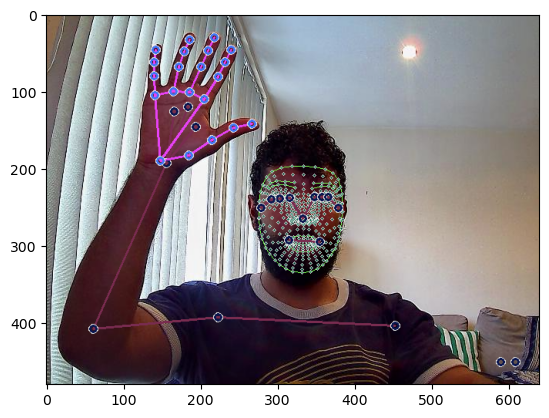

In [15]:
# Draw styled landmarks on the frame
draw_styled_landmarks(frame, results)
    
    # Convert the frame from BGR to RGB for displaying with matplotlib
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
# Display the frame with styled landmarks using matplotlib
    
plt.show()
draw_styled_landmarks(frame, results)

In [16]:
#show all the frames captured
frame

array([[[ 72, 101, 132],
        [ 74, 103, 134],
        [ 76, 105, 136],
        ...,
        [121, 124, 122],
        [121, 124, 122],
        [122, 125, 123]],

       [[ 73, 102, 133],
        [ 74, 103, 134],
        [ 76, 105, 136],
        ...,
        [121, 124, 122],
        [121, 124, 122],
        [122, 125, 123]],

       [[ 76, 105, 136],
        [ 76, 105, 136],
        [ 76, 105, 136],
        ...,
        [121, 124, 122],
        [121, 124, 122],
        [122, 125, 123]],

       ...,

       [[ 74,  81,  84],
        [ 70,  77,  79],
        [ 91,  98,  98],
        ...,
        [154, 160, 179],
        [108, 114, 134],
        [ 17,  23,  43]],

       [[ 81,  88,  91],
        [ 64,  71,  73],
        [ 62,  69,  69],
        ...,
        [ 95, 101, 119],
        [131, 137, 156],
        [141, 147, 166]],

       [[ 85,  92,  95],
        [ 81,  88,  90],
        [ 73,  80,  80],
        ...,
        [ 82,  89, 106],
        [ 37,  43,  62],
        [146, 152, 171]]

In [ ]:
EXTRACT AND SAVE THE LANDMARKS

In [17]:
# Define the list of landmarks and their corresponding names
landmarks_list = [results.face_landmarks, results.pose_landmarks, results.left_hand_landmarks, results.right_hand_landmarks]
landmarks_names = ["face", "pose", "left hand", "right hand"]

# Iterate over each set of landmarks and their names
for landmarks, name in zip(landmarks_list, landmarks_names):
    # Check if landmarks are detected
    if landmarks:
        # Get the number of landmarks detected
        num_landmarks = len(landmarks.landmark)
        # Print the number of landmarks detected for the current set
        print(f"Number of landmarks detected for {name}: {num_landmarks}")
    else:
        # Print a message if no landmarks are detected for the current set
        print(f"No landmarks detected for {name}.")


Number of landmarks detected for face: 468
Number of landmarks detected for pose: 33
No landmarks detected for left hand.
Number of landmarks detected for right hand: 21


In [18]:
# EXTRACT LANDMAKRS

def extract_keypoints(results):
    # Extract pose landmarks if available, otherwise initialize with zeros
    pose_landmarks = results.pose_landmarks
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in pose_landmarks.landmark]).flatten() if pose_landmarks else np.zeros(33 * 4)
    
    # Extract face landmarks if available, otherwise initialize with zeros
    face_landmarks = results.face_landmarks
    face = np.array([[res.x, res.y, res.z] for res in face_landmarks.landmark]).flatten() if face_landmarks else np.zeros(468 * 3)
    
    # Extract left hand landmarks if available, otherwise initialize with zeros
    left_hand_landmarks = results.left_hand_landmarks
    left_hand = np.array([[res.x, res.y, res.z] for res in left_hand_landmarks.landmark]).flatten() if left_hand_landmarks else np.zeros(21 * 3)
    
    # Extract right hand landmarks if available, otherwise initialize with zeros
    right_hand_landmarks = results.right_hand_landmarks
    right_hand = np.array([[res.x, res.y, res.z] for res in right_hand_landmarks.landmark]).flatten() if right_hand_landmarks else np.zeros(21 * 3)

    # Concatenate all keypoints
    return np.concatenate([pose, face, left_hand, right_hand])

# Example usage
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [22]:
#Create a folder
def create_data_directories(data_path, actions, no_sequences):
    try:
        # Create the main data directory
        os.makedirs(data_path)
    except FileExistsError:
        # If the directory already exists, no action is needed
        pass

    # Loop through each action and sequence to create directories
    for action in actions: 
        for sequence in range(no_sequences):
            try: 
                # Create the directory
                dir_path = os.path.join(data_path, action, str(sequence))
                os.makedirs(dir_path)
                # Print a message indicating successful creation
                print(f"Created directory '{dir_path}' for action '{action}' and sequence {sequence}")
            except FileExistsError:
                # Print a message if directory already exists
                print(f"Directory for action '{action}' and sequence {sequence} already exists")
            except Exception as e:
                # Print an error message if directory creation fails
                print(f"Error creating directory for action '{action}' and sequence {sequence}: {e}")

# Path for exported data, numpy arrays
DATA_PATH = 'MD_Data1' 

# Actions that we try to detect
actions = ['hello', 'thanks', 'i lovey you', "please", "yes", "no", "bye"]

# Number of sequences (videos)
no_sequences = 12
# Number of frames per video
sequence_length = 12

# Call the function to create data directories
create_data_directories(DATA_PATH, actions, no_sequences)


Created directory 'MD_Data1\hello\0' for action 'hello' and sequence 0
Created directory 'MD_Data1\hello\1' for action 'hello' and sequence 1
Created directory 'MD_Data1\hello\2' for action 'hello' and sequence 2
Created directory 'MD_Data1\hello\3' for action 'hello' and sequence 3
Created directory 'MD_Data1\hello\4' for action 'hello' and sequence 4
Created directory 'MD_Data1\hello\5' for action 'hello' and sequence 5
Created directory 'MD_Data1\hello\6' for action 'hello' and sequence 6
Created directory 'MD_Data1\hello\7' for action 'hello' and sequence 7
Created directory 'MD_Data1\hello\8' for action 'hello' and sequence 8
Created directory 'MD_Data1\hello\9' for action 'hello' and sequence 9
Created directory 'MD_Data1\hello\10' for action 'hello' and sequence 10
Created directory 'MD_Data1\hello\11' for action 'hello' and sequence 11
Created directory 'MD_Data1\thanks\0' for action 'thanks' and sequence 0
Created directory 'MD_Data1\thanks\1' for action 'thanks' and sequence 

In [30]:
cap.release()
cv2.destroyAllWindows()

In [23]:
#new version
import cv2
import os
import numpy as np
from mediapipe.python.solutions import holistic as mp_holistic


# Initialize video capture
cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'Collection started', (120, 200),
                                cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 50),
                                cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_PLAIN, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Pause recording when 'p' key is pressed
                key = cv2.waitKey(10)
                if key == ord('1'):
                    cv2.putText(image, 'PAUSED', (120,200), 
                               cv2.FONT_HERSHEY_PLAIN, 1, (0,0, 255), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(-1)  # Wait indefinitely until another key is pressed to resume

                # Break gracefully when 'q' key is pressed
                elif key == ord('2'):
                    break
                    
cap.release()
cv2.destroyAllWindows()


In [21]:
cap.release()
cv2.destroyAllWindows()

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [25]:
#new version
actions = ['hello', 'thanks', 'i lovey you', "please", "no", "yes","bye"] 

# Initialize an empty dictionary to store the label map
label_map = {}

# Iterate through the actions and assign a unique number to each label
for num, label in enumerate(actions):
    label_map[label] = num

# Print the label map dictionary
print(label_map)


{'hello': 0, 'thanks': 1, 'i lovey you': 2, 'please': 3, 'no': 4, 'yes': 5, 'bye': 6}


In [26]:
#new version
DATA_PATH = os.path.join('MD_Data1') 
sequence_length = 12  # Adjust the value as per your requirement


sequences, labels = [], []

# Loop through actions
for action in actions:
    # Loop through sequences
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        # Loop through frames in the sequence
        for frame_num in range(sequence_length):
            # Load keypoints data
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [27]:
#sequence is converted into a array and the shape is printed as follow the total number of images or labels captured, number of sequences captured per action and the total of landmarks used 
np.array(sequences).shape


(84, 12, 1662)

In [28]:
X = np.array(sequences)

In [29]:
#This code converts a list of integer labels (labels) into a one-hot encoded format using the to_categorical function from Keras. Each label is converted into a vector where the index corresponding to the label's value is set to 1, and all other indices are set to 0
y = to_categorical(labels).astype(int)


In [30]:
#the data is split into training 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)


In [31]:
#print the shape of the y_test results
y_test.shape


(2, 7)

In [32]:
# Import the Sequential class 
from tensorflow.keras.models import Sequential

# Import the LSTM and Dense layers 
from tensorflow.keras.layers import LSTM, Dense

# Import the TensorBoard callback 
from tensorflow.keras.callbacks import TensorBoard


In [33]:
# Import the os module
import os

# Define the directory path for storing the TensorBoard logs
log_dir = os.path.join('Logs')

# Create a TensorBoard callback object with the specified log directory
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

# Convert the list 'actions' to a NumPy array
actions = np.array(['hello', 'thanks', 'i lovey you', "please",  "yes", "no", "bye"])

# Create a Sequential model
model = Sequential()

# Add the input layer with specified input shape
model.add(Input(shape=(12, 1662)))

# Add LSTM layers with specified configurations is it recommended to begin with lower numbers
model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(32, return_sequences=False, activation='relu'))

# Add Dense layers with specified configurations
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(actions.shape[0], activation='softmax'))

# Print the shape of the actions array
print(actions.shape)


(7,)


In [35]:
# Compile the model with Adam optimizer, categorical crossentropy loss, and categorical accuracy metric
model.compile(
    optimizer='Adam',  # Using Adam optimizer for training
    loss='categorical_crossentropy',  # Categorical crossentropy loss for multi-class classification
    metrics=['categorical_accuracy']  # Evaluation metric to monitor during training
)


In [36]:
#new version
# Train the model on the training data with specified number of epochs and TensorBoard callback
model.fit(
    X_train,  # Training input data
    y_train,  # Training target data
    epochs=150,  # Number of training epochs/ epochs number of times the entire dataset is passed forward and backward through the neural network
    callbacks=[tb_callback]  # List of callbacks to apply during training 
)


Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - categorical_accuracy: 0.1608 - loss: 2.0405
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.1435 - loss: 2.3240
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.1018 - loss: 1.9502
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.1413 - loss: 1.9521
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.1391 - loss: 1.9391
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.1935 - loss: 1.9344
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.1296 - loss: 1.9297
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.1374 - loss: 1.8709
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.1139 - loss: 1.8163
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.1569 - loss: 1.7264
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

In [37]:
# Display a summary of the model architecture
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 32)         │       216,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 12, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 767,735 (2.93 MB)

 Trainable params: 255,911 (999.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 511,824 (1.95 MB)

In [38]:
# Make predictions on the test data
predictions = np.array(model(X_test))


In [39]:
res = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


In [40]:
# Get the action label corresponding to the highest predicted probability
predicted_action = actions[np.argmax(res[0])]


In [41]:
actions[np.argmax(res[0])]


'no'

In [42]:
actions[np.argmax(res[1])]


'thanks'

In [43]:
actions[np.argmax(res[0])]

'no'

In [44]:
actions[np.argmax(y_test[0])]


'no'

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score


In [46]:
yhat = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [47]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

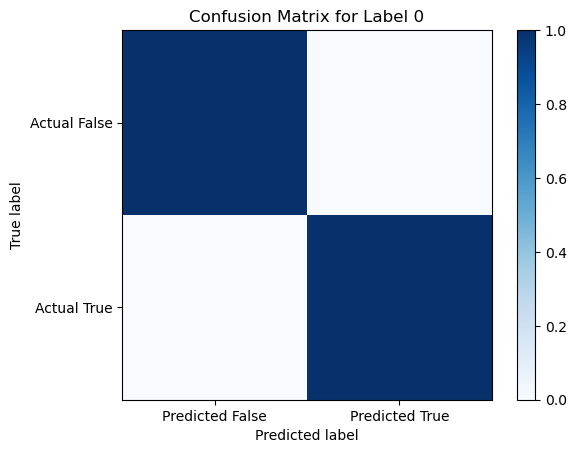

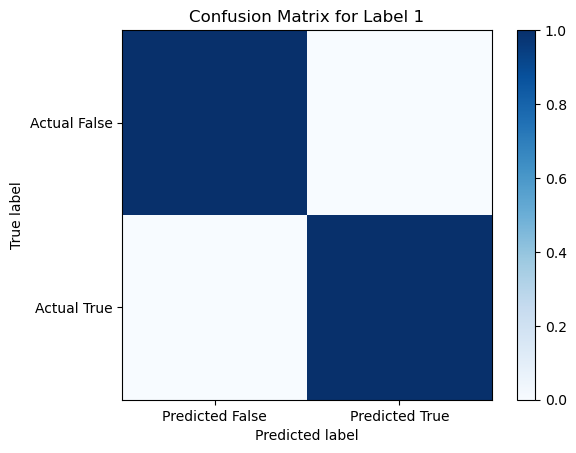

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

# Compute the multilabel confusion matrix
mcm = multilabel_confusion_matrix(ytrue, yhat)

# Plot the confusion matrix for each label
for i, cm in enumerate(mcm):
    # Check for zero division
    if np.sum(cm, axis=1)[0] == 0 or np.sum(cm, axis=1)[1] == 0:
        cm_normalized = cm
    else:
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot the confusion matrix as an image
    plt.figure()
    plt.imshow(cm_normalized, cmap=plt.cm.Blues, interpolation='nearest')
    plt.title(f'Confusion Matrix for Label {i}')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Predicted False', 'Predicted True'])
    plt.yticks(tick_marks, ['Actual False', 'Actual True'])
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


In [50]:
#print accurancy
accuracy_score(ytrue, yhat)


1.0

In [70]:
colors = [(np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for _ in range(len(actions))]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

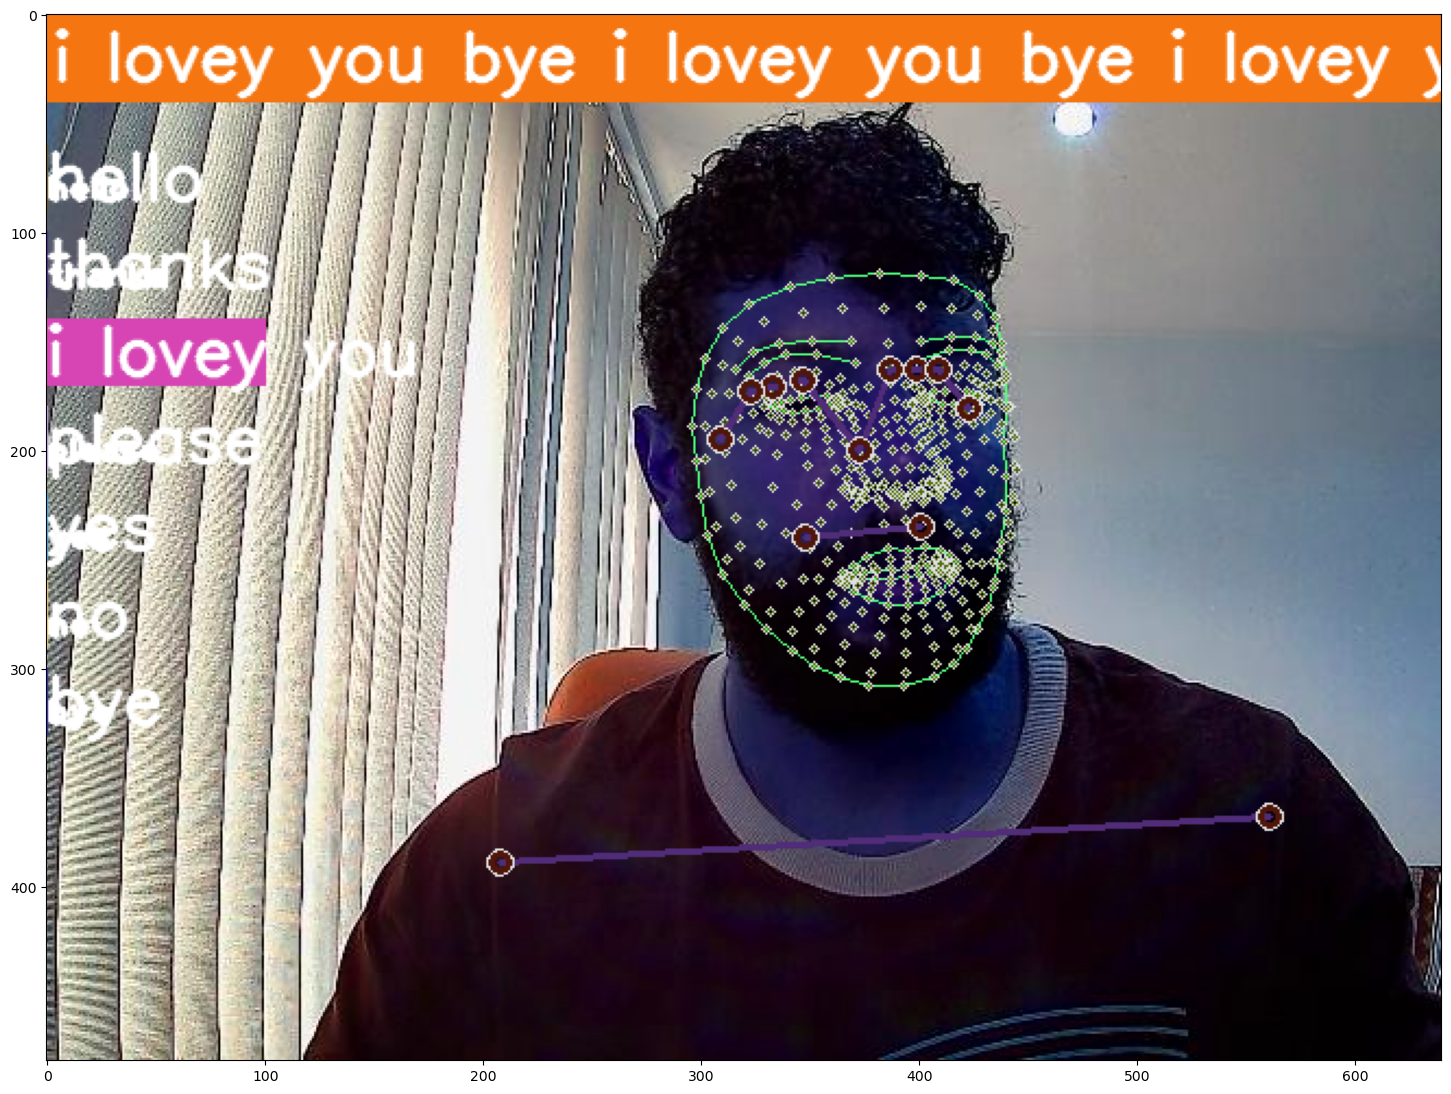

In [71]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [73]:
sequence = []
sentence = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:12]
        sequence.append(keypoints)
        sequence = sequence[-12:]
        
        if len(sequence) == 12:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('1'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
bye
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
bye
<class 'mediapipe.pyth

In [74]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [77]:
model.save('action1.h5')

In [64]:
cap.release()
cv2.destroyAllWindows()